In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models 
from tensorflow.keras.datasets import mnist
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image

In [39]:
# Paso 2: Cargar el conjunto de datos MNIST (tiene 60 mil imágenes)
#Xtesr y y Test tuenen 10 mil imagenes de prueba.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

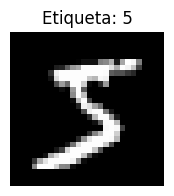

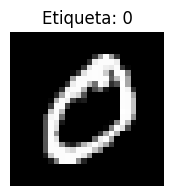

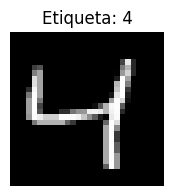

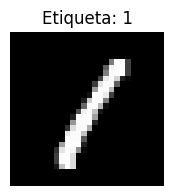

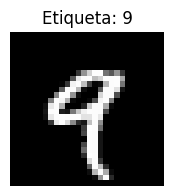

In [40]:
# Paso 2: Visualizar las primeras X imágenes del conjunto de entrenamiento

for i in range(5):

    plt.figure(figsize=(2, 2))  # Tamaño de la figura

    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises

    plt.title(f"Etiqueta: {y_train[i]}")  # Título con la etiqueta de la imagen

    plt.axis('off')  # Ocultar ejes

    plt.show()

In [41]:
# Paso 3: Preprocesar los datos
x_train = x_train.astype('float32') / 255  # Normalización
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes
x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [42]:
# Paso 4: Definir el modelo MLP.. construcción red neuronal
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

c:\SEBASTIAN\BOOTCAMP IA\mlp_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
# Paso 6: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8675 - loss: 0.4666 - val_accuracy: 0.9566 - val_loss: 0.1380
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9701 - loss: 0.1000 - val_accuracy: 0.9699 - val_loss: 0.0994
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.0580 - val_accuracy: 0.9702 - val_loss: 0.0963
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9854 - loss: 0.0443 - val_accuracy: 0.9752 - val_loss: 0.0857
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9900 - loss: 0.0301 - val_accuracy: 0.9759 - val_loss: 0.0895
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0249 - val_accuracy: 0.9711 - val_loss: 0.1036
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9772 - val_loss: 0.0892
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9953 - loss: 0.0162 - val_accuracy: 0.

In [46]:
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.1086
Precisión en el conjunto de prueba: 0.9794999957084656


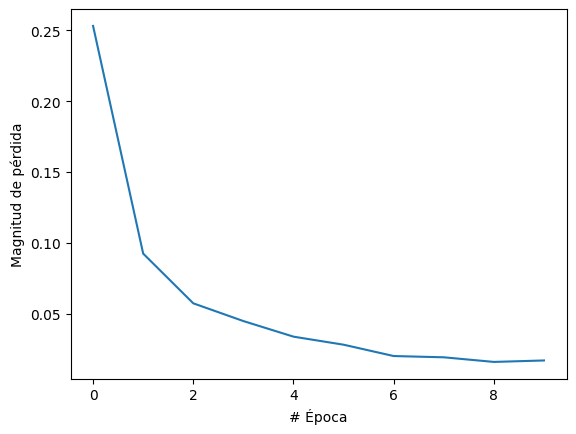

In [74]:
plt.xlabel("# Época")

plt.ylabel("Magnitud de pérdida")

plt.plot(history.history["loss"])

In [47]:
# Paso 8: Probar el modelo con una imagen del conjunto de prueba
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen)
digit_predicho = np.argmax(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


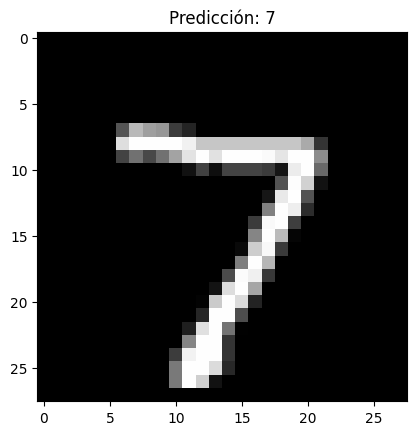

In [48]:
# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()


In [49]:
# A partir de aqui para carga una imágen de manera local
# Paso 9: Probar el modelo con una imagen personalizada
ruta_imagen="C:\SEBASTIAN\BOOTCAMP IA/Image_Prueba.png"
def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()


In [50]:
model.save("mlp_model.h5") #Guardar Modelo como archivo HDF5
print("Modelo Guardado")

Modelo Guardado


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicción para la imagen personalizada: 4


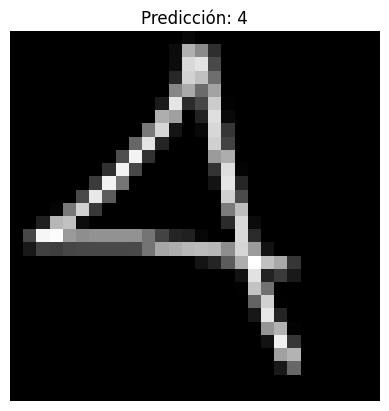

In [51]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/Image_Prueba.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción para la imagen personalizada: 2


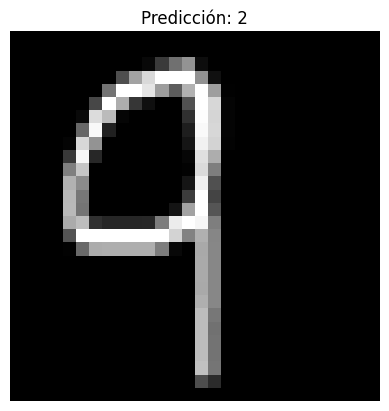

In [52]:
#Prueba Con imagen
ruta_imagen = "C:\SEBASTIAN\BOOTCAMP IA\mlp_env\imagen prueba3.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicción para la imagen personalizada: 0


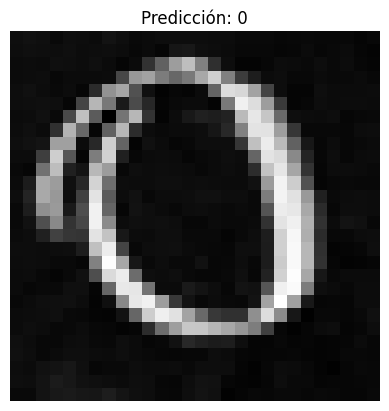

In [58]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/imagencero.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción para la imagen personalizada: 0


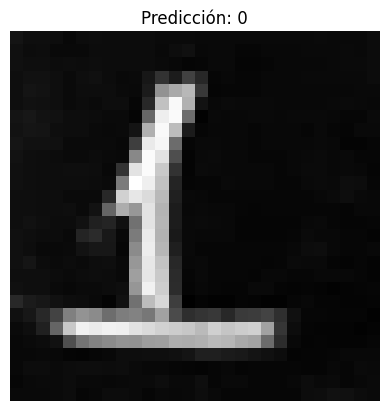

In [59]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/1.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicción para la imagen personalizada: 0


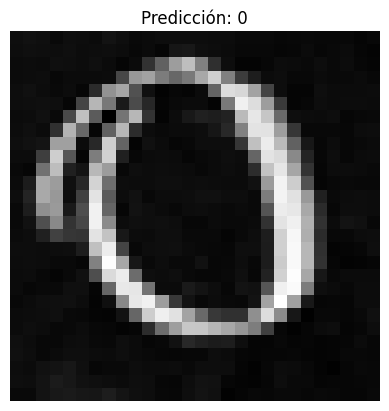

In [64]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/imagencero.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción para la imagen personalizada: 0


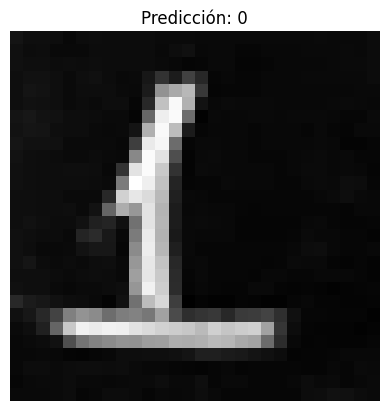

In [65]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/1.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicción para la imagen personalizada: 2


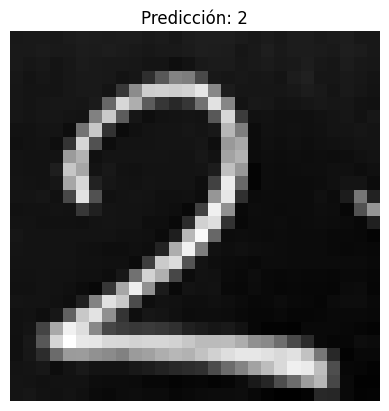

In [66]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/2.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicción para la imagen personalizada: 5


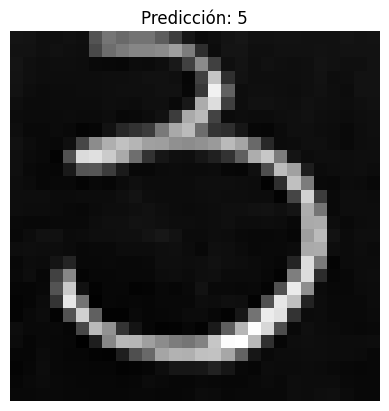

In [67]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/3.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción para la imagen personalizada: 9


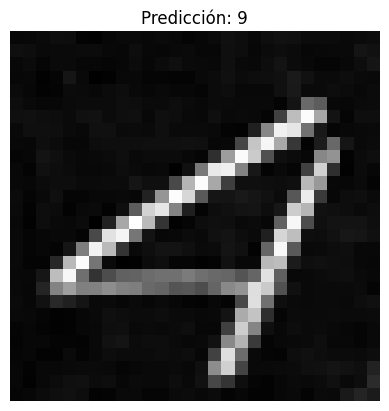

In [68]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/4.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción para la imagen personalizada: 5


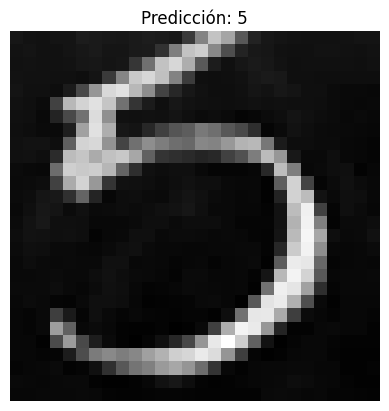

In [69]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/5.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicción para la imagen personalizada: 6


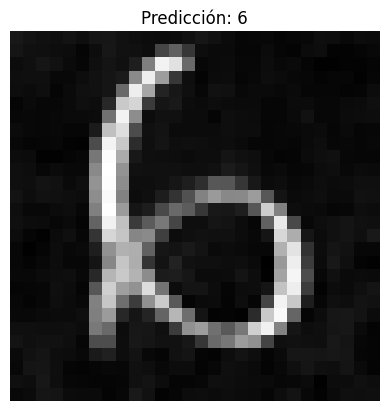

In [70]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/6.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicción para la imagen personalizada: 3


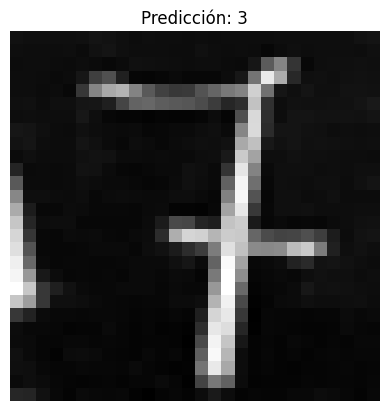

In [71]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/7.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicción para la imagen personalizada: 8


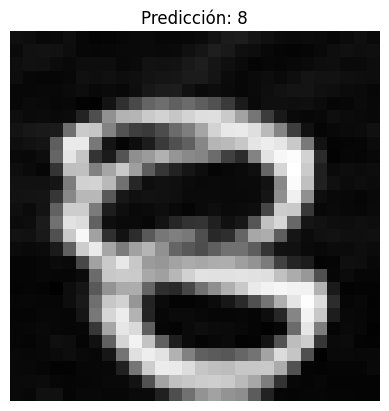

In [72]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/8.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicción para la imagen personalizada: 7


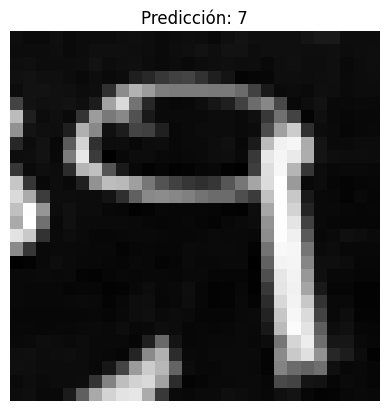

In [73]:
#Prueba Con imagen
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/9.png"

def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Opcional: desactivar los ejes para una visualización más limpia
    plt.show()

predecir_imagen_personalizada(ruta_imagen)